In [1]:
import sys
sys.path.append("..")  # Add the parent directory to the path


### visualize point cloud 

In [13]:
import open3d as o3d 

dataset = "hope"
object_id = 1
face = "down"
num_views = 7
path_pcd = f"/home/sergio/onboarding_stage/data/{dataset}/obj_{object_id:06d}/{face}/{num_views}_views/sparse/0/points3D.ply"

point_cloud = o3d.io.read_point_cloud(path_pcd)
o3d.visualization.draw_geometries([point_cloud])

### visualize point cloud aligned 

In [ ]:
import open3d as o3d 

dataset = "hope"
object_id = 1
num_views = 7
path_pcd = f"/home/sergio/onboarding_stage/data/{dataset}/obj_{object_id:06d}/align/sparse/0/points3D.ply"

point_cloud = o3d.io.read_point_cloud(path_pcd)
o3d.visualization.draw_geometries([point_cloud])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### test poses 

In [12]:
from utils.colmap_loader import read_pose_matrices

dataset = "hope"
object_id = 1
num_views = 7
path_poses = f"/home/sergio/onboarding_stage/data/{dataset}/obj_{object_id:06d}/align/sparse/0/images.txt"

poses = read_pose_matrices(path_poses)

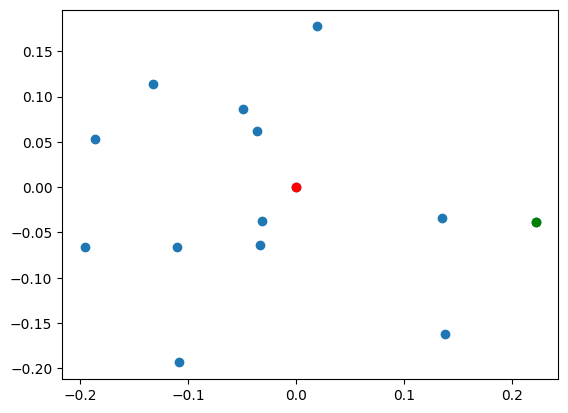

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 

poses_mat = [poses[idx]['pose'] for idx in range(len(poses))]
t_vecs = [pose_mat[:3, 3] for pose_mat in poses_mat]
t_vecs = np.vstack(t_vecs)

plt.scatter(t_vecs[:, 0], t_vecs[:, 1])
plt.scatter(t_vecs[0, 0], t_vecs[0, 1], c='red')
plt.scatter(t_vecs[-1, 0], t_vecs[-1, 1], c='green')
plt.show()

### visualize camera poses 

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.


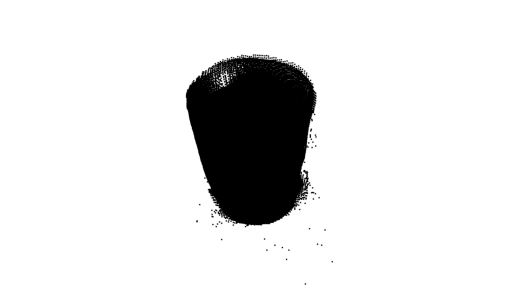

In [3]:
import open3d as o3d
import numpy as np
from utils.colmap_loader import read_pose_matrices

dataset = "hope"
object_id = 1
pcd_path = f"/home/sergio/onboarding_stage/data/{dataset}/obj_{object_id:06d}/align/sparse/0/points3D.ply"
pose_file = f"/home/sergio/onboarding_stage/data/{dataset}/obj_{object_id:06d}/align/sparse/0/images.txt"

# Load camera poses
poses = read_pose_matrices(pose_file)
poses_mat = [pose['pose'] for pose in poses]

# Load the point cloud
pcd = o3d.io.read_point_cloud(pcd_path)

# Create a visualizer
vis = o3d.visualization.Visualizer()
vis.create_window(visible=False)  # Create a window for offscreen rendering
vis.add_geometry(pcd)

# Set the camera pose (extrinsic parameters)
camera_pose = poses_mat[-1]

# Set the intrinsics (Pinhole camera model)
width, height = 640, 480
fx, fy = 500, 500  # Focal length
cx, cy = width / 2, height / 2  # Principal point

intrinsic = o3d.camera.PinholeCameraIntrinsic(width, height, fx, fy, cx, cy)

# Configure the camera parameters
ctr = vis.get_view_control()
param = ctr.convert_to_pinhole_camera_parameters()
param.extrinsic = camera_pose
param.intrinsic = intrinsic
ctr.convert_from_pinhole_camera_parameters(param)

# Capture the rendered image
vis.poll_events()
vis.update_renderer()
image = vis.capture_screen_float_buffer(do_render=True)

# Save or display the image
import matplotlib.pyplot as plt
plt.imshow(np.asarray(image))
plt.axis('off')
plt.show()

# Clean up
vis.destroy_window()


In [4]:
poses_mat

[array([[ 0.99998586, -0.00182106,  0.00499697,  0.        ],
        [ 0.00179355,  0.99998324,  0.00550486,  0.        ],
        [-0.00500692, -0.00549582,  0.99997236,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.99133343,  0.11153221, -0.06941612, -0.03099336],
        [-0.10141677,  0.98560647,  0.13525723, -0.03785058],
        [ 0.08350252, -0.12704505,  0.98837588,  0.08236971],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.25962957,  0.75904918, -0.59702332, -0.11050352],
        [-0.73018789,  0.55888856,  0.39302574, -0.06586803],
        [ 0.63199537,  0.33389809,  0.69935251,  0.03646938],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[-0.05933315, -0.53321121,  0.84389896,  0.13774833],
        [ 0.78050401,  0.50225787,  0.3722238 , -0.16230707],
        [-0.62232881,  0.68075169,  0.38637291,  0.10496252],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
